In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

#!ls "/content/drive/MyDrive"
path='/content/drive/MyDrive/HUPI_formation/hupi-projet/'

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno


# Preprocess and load data

In [ ]:
df = pd.read_csv(path +'dataset_house.csv')#, sep = ";")

In [ ]:
cpdf = df.copy()

## First glympse on our data

In [ ]:
#print(df)
print(df.head(3)) #Display first 3 rows
print(df.tail(3)) #Display last 3 rows

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   

   sqft_lot15  
0        5650  
1        7639  
2        8062  

[3 rows x 21 col

##Further info on our dataset

In [ ]:
print("**********************")
print("Columns : ")
print(df.columns) #Display columns names
print("**********************")
print("Types : ")
print(df.dtypes) #display columns types

**********************
Columns : 
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
**********************
Types : 
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


What we learned :
* Thanks to '.columns' :
  * The columns' names
* Thanks to '.dtypes' :
  * The columns' types
* Thanks to '.info()' :
  * Give again the columns' names and types
  * The count of null and non-null value in each column
  * (The memory usage)


### Summary on our dataframe

In [ ]:
#Basic info
print(df.info()) #display general info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  


Thanks to '.info()' :
  * Give again the columns' names and types
  * The count of null and non-null value in each column
  * (The memory usage)


In [ ]:
#Descriptive Statistics of Dataset
print(df.describe().T)

                 count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+

Thanks to '.descibe().T' (.T is used to show the columns as row, to obatin a more readable and compact summary):
  * Mathematical info for each numerical column such as :
    * count
    * mean
    * standard deviation
    * minimum
    * 25th percentile
    * 50th percentile (median)
    * 75th percentile, and maximum values


Shape of the dataset:  (21613, 21)
_______________________________________
Number of null values: 
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
_______________________________________
Number of unique values: 
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long     

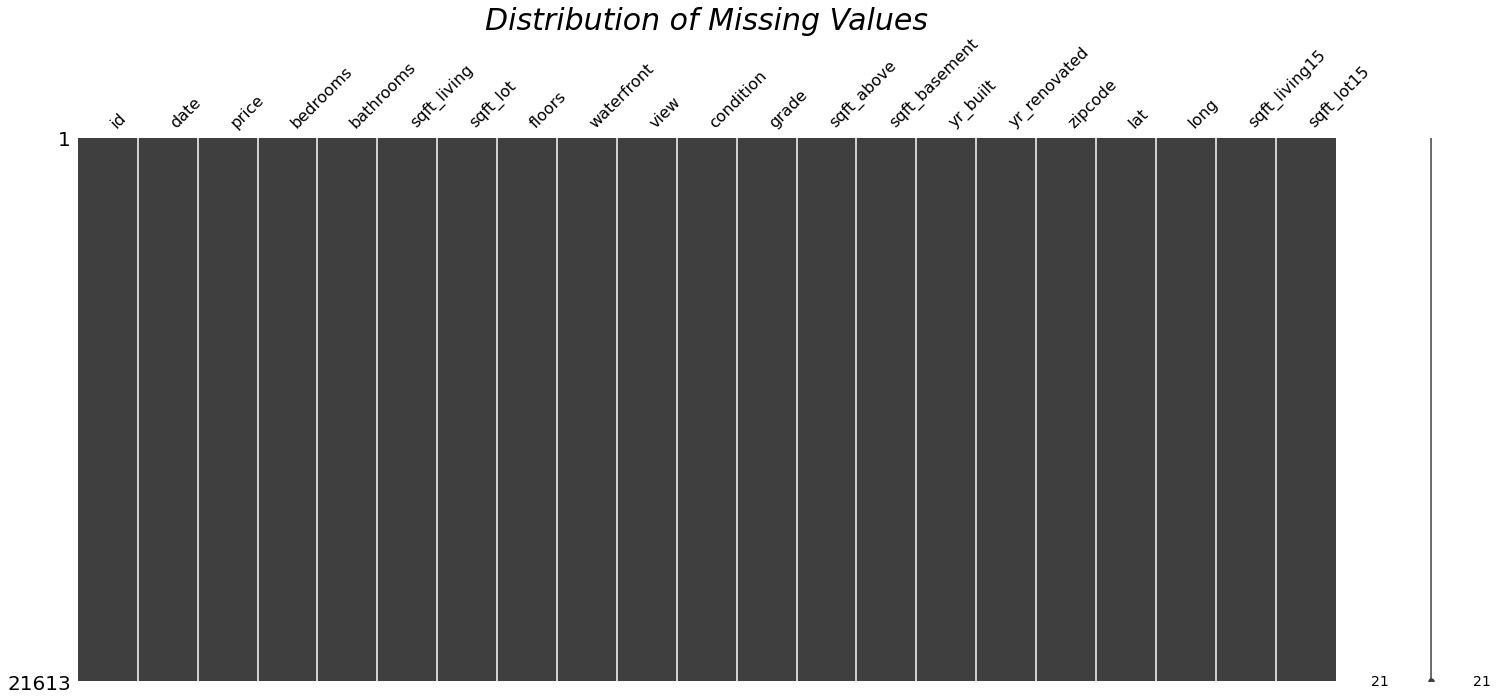

In [ ]:
#Other Useful Information About Dataset
print("Shape of the dataset: ", df.shape)
print("_______________________________________")
print("Number of null values: ")
print(df.isnull().sum())
print("_______________________________________")
print("Number of unique values: ")
print(df.nunique())
msno.matrix(df)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique');
plt.show()

 Thanks to '.shape' :
  * The size of the dataframe : its number of columns and rows
* Thanks to '.isnull().sum()' :
  * the number of null value for each column (already obtained with .info()
* Thanks to '.nunique()' :
  * The count of distinct value for each column
  * showing the distribution of missing value isn't relevant as we haven't any missing value

In [ ]:
# Correlation Between Attributes
corr=df.corr()
display(corr.style.background_gradient(cmap='Reds'))
#print(corr)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


 Thanks to '.corr()' :
  * The pairwise correlation between all columns of the dataframe

The result is store in a new dataframe named 'corr', where each element (i, j) represents the correlation between columns i and j).

By applying a red color gradient to the correlation matrix using .style.background_gradient(cmap='Reds'), we can visualize the strength of the correlation between pairs of columns in df. The stronger the correlation (either positive or negative), the darker the red color, while weaker correlations are lighter in color.

You can have a view on this correlation table without the color by using the print command instead of using display

### Deal with null/missing values

Thanks to  '.info()', 'isnull()' and 'msno.matrix()' we had a view on the missing value of our dataset.

Fortunately we have no problem as there isn't any missing value.

However, we need to keep in mind that handling missing value is part of the job of the data scientist.

So I will write a short part on it.

How to deal with missing values ? We had a good reminder through the Hupi formation.

Some methods:
* Allocation: the purpose is to replace missing value using a value from the other right rows of the dataset
  * by a constant, (fix by us)
  * by the average,
  * by the median,
  * by the most represented data, ...
* Interpolation: from a finite number of points reconstruct a function
  * linear,
  * polynomial,
  * spline (a piecewise polynomial function),
  * cubic (particular case of polynomial of order 3), ...
* K-nearest neighbors reconstruction


### Deal with date Type

Previously we obtained the type of each column. And the only column with a weird type is the date column, and it can be interesting to convert it into a true date type.

Let's see how to do it

In [ ]:
from datetime import datetime

In [ ]:
print(df['date'])

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object


The date format is : YearMonthDay

In [ ]:
cpdf[['dateYMD', 'other']] = cpdf['date'].str.split("T", expand = True)
cpdf['dateYMD'] = pd.to_datetime(cpdf['dateYMD'], format='%Y%m%d') # convert the date from object type to date type
cpdf['date'] = cpdf['dateYMD']
cpdf = cpdf.drop(['dateYMD', 'other'], axis=1) # drop the newly created columns
cpdf

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


##Visualizations

Let's observe more deeply our dataset.

Firstly, I will introduce traditional visualization graphs, frequently used.
Then I will use the mosts suitable for the dataset in order to zoom on it.


##### Examples

###### Pie chart

Extensively used in presentations and offices, Pie Charts help show proportions and percentages between categories, by dividing a circle into proportional segments. Each arc length represents a proportion of each category, while the full circle represents the total sum of all the data, equal to 100%.

Pie Charts are ideal for giving the reader a quick idea of the proportional distribution of the data. However, the major downsides to pie charts are:
* They cannot show more than a few values, because as the number of values shown increases, the size of each segment/slice becomes smaller. This makes them unsuitable for large datasets with many categories.
* They take up more space than their alternatives, for example, a 100% Stacked Bar Chart. Mainly due to their size and the usual need for a legend.
* They are not great for making accurate comparisons between groups of Pie Charts. This is because it is harder to distinguish the size of items via area when it is for length.

Despite that, comparing a given category (one slice) within the total of a single Pie Chart, then it can often be more effective.

###### Bar chart

Also known as Bar Graph or Column Graph.

A Bar Chart uses either horizontal or vertical bars (column chart) to show discrete, numerical comparisons across categories. One axis of the chart shows the specific categories being compared and the other axis represents a discrete value scale.

Bar Charts are distinguished from Histograms, as they do not display continuous developments over an interval. Instead, Bar Chart's discrete data is categorical and therefore answers the question of "how many?" in each category.

So, it become easy to predict that I will not apply these graph on all the column :
* A column with too many disctinct values will make our pie chart too blurry. It will become unreadable!
* Idem for the bar plot, too much distinct values will force us to have a large bar chart, and maybe have lot of bar representing only one element

So, I took the number of bedrooms, bathrooms, floors, waterfront, view, condition, grade. All of them have less than 30 distinct value for 21613 rows, which I consider as a low number.

You will see that even with such low numbers, you will struggle to read some of these graphs.

In [ ]:
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']
cat_cols=["bedrooms","bathrooms","floors","waterfront","view","condition","grade"]
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    return iplot(fig)

for col in cat_cols:
    zz = cat_summary_with_graph(df,col)
    plt.show(zz)

###### Map

Maps can be a useful tool in data visualization for several reasons:
* Geospatial data: Maps can be used to visualize data that is geospatial in nature, such as locations of cities, distribution of populations, or patterns of migration. By displaying data on a map, patterns and relationships that might not be apparent in a table of numbers can become more visible.
* Context: Maps provide context for data that can be difficult to grasp in other forms. For example, a table of numbers showing the number of people affected by a natural disaster might not be very meaningful, but displaying that data on a map can show where the disaster occurred and how it affected different regions.
* Interactive: Maps can be made interactive, allowing users to zoom in and out, click on different points to display more information, and even overlay different layers of data. This can make it easier for users to explore and understand the data.
* Communication: Maps can be an effective way to communicate complex data to a wide audience. By presenting data in a visually compelling way, maps can help to engage viewers and convey important messages.

Overall, maps can be a powerful tool in data visualization, helping to reveal patterns, provide context, and communicate complex data in a compelling way.

Here I just use it to show the localisation of the houses, but remember that it can be used for several purpose way useful than this one.

In [ ]:
import folium
map = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=7)

# Select 100 random rows from the DataFrame
sample_df = df.sample(n=100, random_state=1)

# Add markers to the map for each row in your DataFrame
for index, row in sample_df.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(map)

# Display the map
map


###### Histogram

A Histogram visualises the distribution of data over a continuous interval. Each bar in a histogram represents the tabulated frequency at each interval/bin.

Histograms help give an estimate as to where values are concentrated, what the extremes are and whether there are any gaps or unusual values. They are also useful for giving a rough view of the probability distribution.

Here I will show the price of the house and the frequency


In [ ]:
min_price = df['price'].min()
max_price = df['price'].max()

print('Min price: ', min_price)
print('Max price: ', max_price)
bins = np.linspace(min_price, max_price, 10)
print(bins)

Min price:  75000.0
Max price:  7700000.0
[  75000.          922222.22222222 1769444.44444444 2616666.66666667
 3463888.88888889 4311111.11111111 5158333.33333333 6005555.55555556
 6852777.77777778 7700000.        ]


I calculate the minimum and maximum values of the 'price' column in the DataFrame df (and prints them out).

Then, I created an array of 10 evenly spaced values between the minimum and maximum prices using the np.linspace function, and assigns it to the variable bins. The bins array is later used to create a histogram with 10 bins.


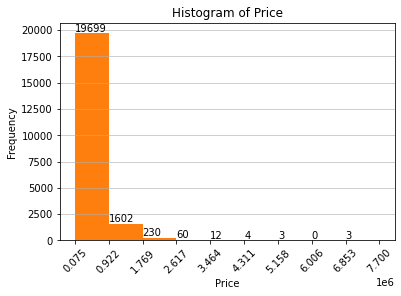

There are  21613 rows


In [ ]:
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.grid(axis='y', alpha=0.75)

# get the current axis object
ax = plt.gca()

# set the x-axis ticks to be the actual price values
ax.set_xticks(bins)

# rotate the x-axis labels to prevent overlap
plt.xticks(rotation=45)
# add text labels above each bar showing the frequency
freqs, bins, _ = ax.hist(df['price'], bins=bins)
rows_nb = 0
for freq, bin in zip(freqs, bins):
    plt.text(bin, freq, int(freq), ha='left', va='bottom')
    rows_nb += freq
plt.show()

print('There are ', int(rows_nb), 'rows') # to check that all rows are displayed

###### Box plot

A Box and Whisker Plot (or Box Plot) is a convenient way of visually displaying the data distribution through their quartiles.

The lines extending parallel from the boxes are known as the “whiskers”, which are used to indicate variability outside the upper and lower quartiles. Outliers are sometimes plotted as individual dots that are in-line with whiskers. Box Plots can be drawn either vertically or horizontally.

Although Box Plots may seem primitive in comparison to a Histogram or Density Plot, they have the advantage of taking up less space, which is useful when comparing distributions between many groups or datasets.

Here are the types of observations one can make from viewing a Box Plot:
* What the key values are, such as: the average, median, 25th percentile, etc.
* If there are any outliers and what their values are.
* If the data is symmetrical or not.
* How tightly is the data grouped.
* If the data is skewed and if so, in what direction.

Two of the most commonly used variation of Box Plot are: variable-width Box Plots and notched Box Plots.

<ipython-input-18-0daeb29a5657>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



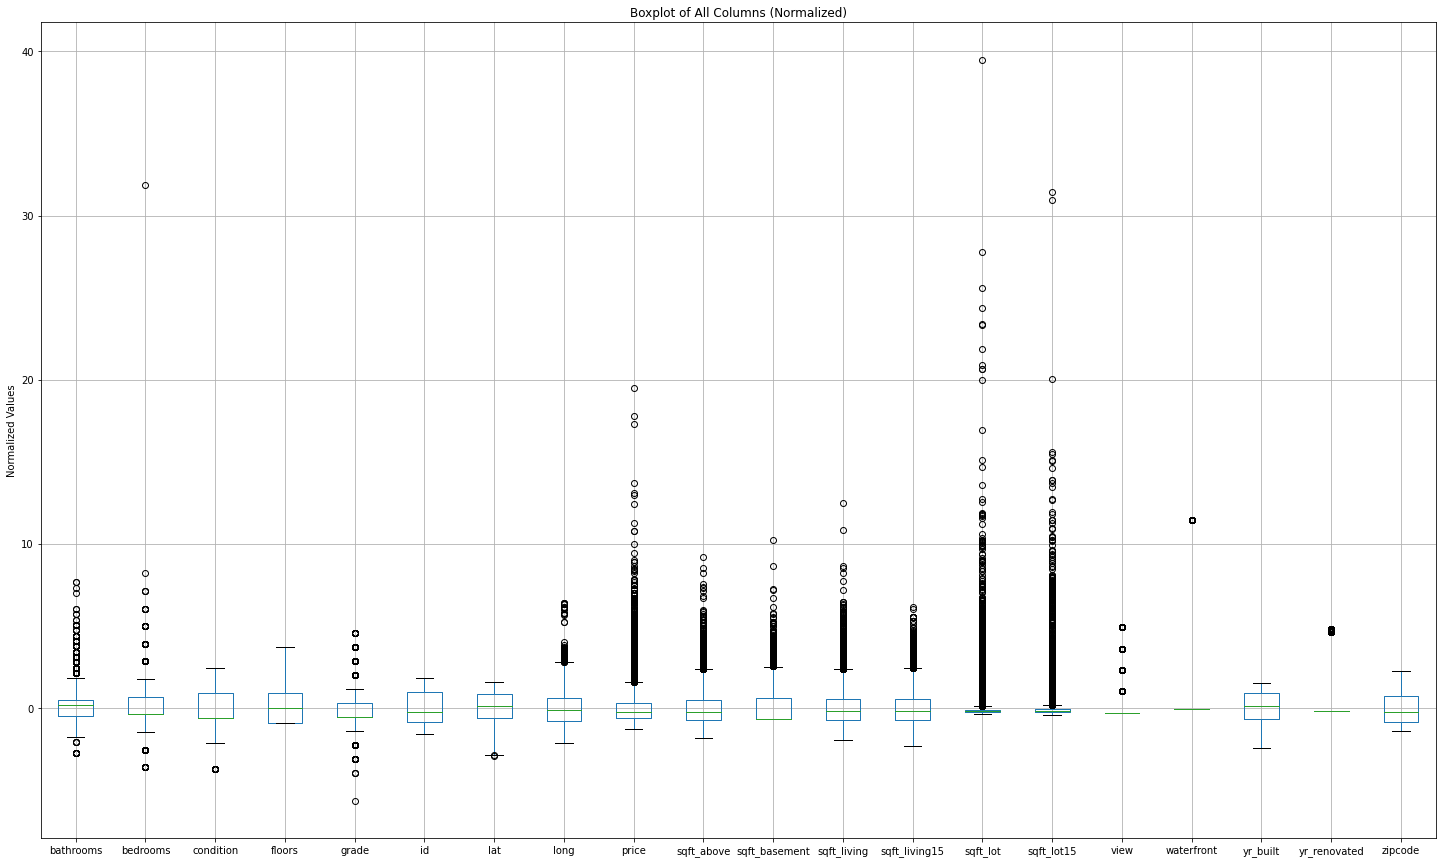

In [ ]:
# normalize the data
df_norm = (df - df.mean()) / df.std()

# create boxplot of normalized data
fig, ax = plt.subplots(figsize=(25, 15)) # set the figure size to 10x6
boxplot = df_norm.boxplot(ax=ax)

# set axis labels and title
ax.set_xlabel('')
ax.set_ylabel('Normalized Values')
ax.set_title('Boxplot of All Columns (Normalized)')

plt.show()

By example, here we have a good view on the distribution over all features.

### Observe our dataframe

#### Pair plots

These plots will give us a good view on the relationship of the columns, by pairing them two by two.

As there are lot of columns and the number of graphs quickly increase, I will only show the pairwise plots between 8 of the features, which corresponds to compute 56 graphs.

<Figure size 720x432 with 0 Axes>

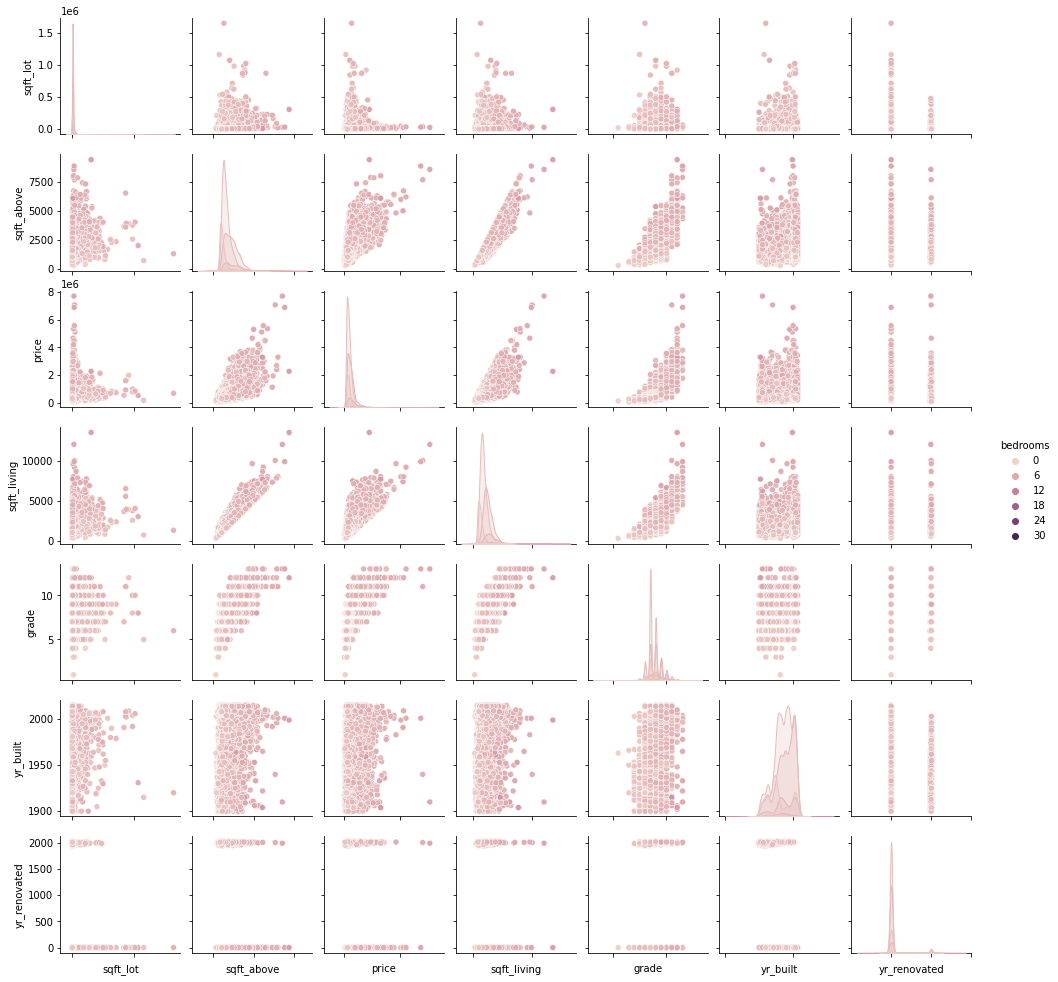

In [ ]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']]
                 ,hue='bedrooms',height=2)
g.set(xticklabels=[])

#### Join plots
Now let's focus on our target column : the price.

With the previous plots we can easily see that a linear regression will perfectly fit for the link between sqft_living with price.

It would be interesting to plot a regression line through the dataset to have a first view.

Let's plot some of the previous in a join plot to explore more on the data.

(Here you can just set y = price, don't worry about observing the relations between other columns as we will use correlation matrix to deal with it, later).

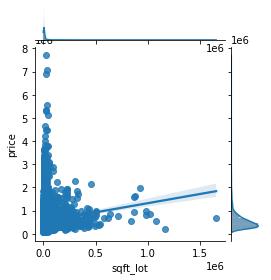

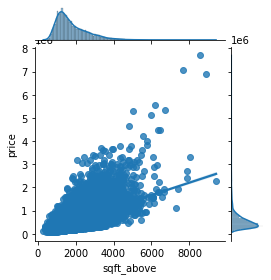

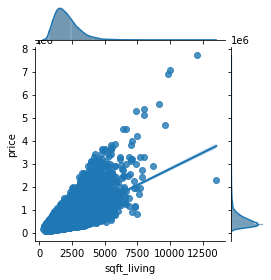

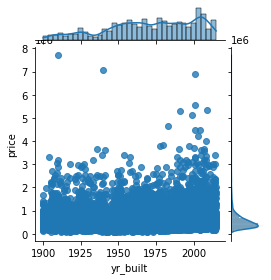

In [ ]:
sns.jointplot(x='sqft_lot',y='price',data=df, kind='reg',height=4)
sns.jointplot(x='sqft_above',y='price',data=df, kind='reg',height=4)
sns.jointplot(x='sqft_living',y='price',data=df, kind='reg',height=4)
sns.jointplot(x='yr_built',y='price',data=df, kind='reg',height=4)

For the last example, the link between yr_built and price, the regression line isn't useful (she is behind all the point, and is almost horizontal)!

So we can just show it with 'scatter' and not 'reg'.


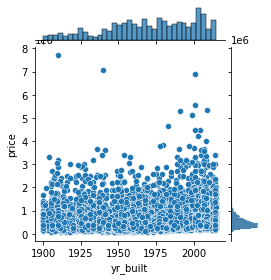

In [ ]:
sns.jointplot(x='yr_built',y='price',data=df, kind='scatter',height=4)

#### Outliers
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.

So, I will create a dataset without the biggest outliers just in case the normal model isn't enough accurate.

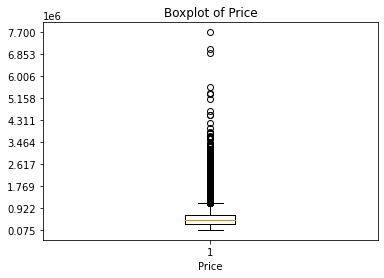

In [ ]:
plt.boxplot(df['price'])
plt.xlabel('Price')
plt.title('Boxplot of Price')
plt.yticks(bins)
plt.show()

Here i have a good idea of my data so I know that i don't need to remove them :
* In real life outlier are the effect of really rare problem. Like a problem in measuring equipment which calculated too high or low values
* Here our outliers are the ffects of rare conditions but not abnormal : few house has 8 rooms, but if they have it's normal they also have a high price. So it's not a real abnormality

To know whether it's one or the other you need to have a good knowledge about your data : about the area, the equipments used to measure it, etc.

In [ ]:
# Find the maximum and minimum values of the 'price' column
max_price = df['price'].max()
min_price = df['price'].min()

# Print the results
print(f"Maximum price: {max_price}")
print(f"Minimum price: {min_price}")

# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(f"Maximum price: {Q1}")
print(f"Minimum price: {Q3}")
print(f"IQR: {IQR}")
print(f"Upper bound: {upper_bound}")
print(f"Lower bound: {lower_bound}")

Maximum price: 7700000.0
Minimum price: 75000.0
Maximum price: 321950.0
Minimum price: 645000.0
IQR: 323050.0
Upper bound: 1129575.0
Lower bound: -162625.0


In [ ]:
# Identify and remove outliers
outliers = df[(df['price'] > upper_bound) | (df['price'] < lower_bound)]
data = df.drop(outliers.index)

# Print the number of removed outliers
print(f'Removed {len(outliers)} outliers out of {len(df)} observations.')

Removed 1146 outliers out of 21613 observations.


Let's have a view on our dataset now we have remove all the outliers

You must note that with this dataset the model may gain in stability but will lose its predictive power on high price

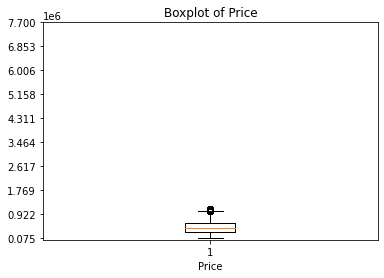

In [ ]:
plt.boxplot(data['price'])
plt.xlabel('Price')
plt.title('Boxplot of Price')
plt.yticks(bins)
plt.show()

#### Correlation

Depending on what you want to achieve normalizing the data can be helpful
to standardize the scale of each variable and avoid the influence of the different units of measurement on the correlation. However, normalizing the data may also change the correlation structure between variables.

Therefore, you can compute the correlation matrix before or after normalizing the data, depending on your specific goals and assumptions. If you are interested in exploring the correlation structure between variables, you may want to compute the correlation matrix before normalization. However, if you want to compare the strength and direction of the correlations between variables without being affected by the scale and units of measurement, normalizing the data and then computing the correlation matrix can be a useful approach.

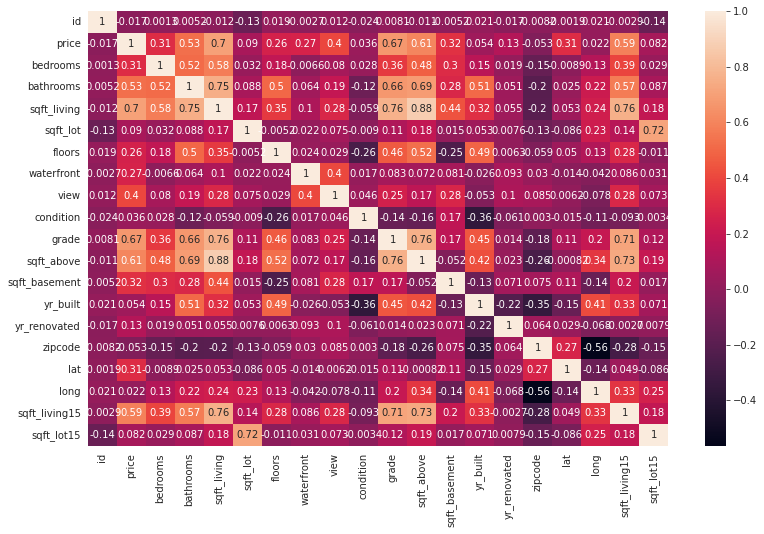

In [ ]:
plt.figure(figsize=(13, 8))
sns.set_style("darkgrid")
sns.heatmap(df.corr(), annot=True)
plt.show()

I will use 2 correlation methods, pearson to detect linear dependencies and spearman for polynomial

* The Pearson correlation coefficient measures the linear relationship between two variables. It assumes that the variables have a normal distribution and that the relationship between them is linear. The coefficient can range from -1 to 1, where -1 indicates a perfectly negative correlation, 0 indicates no correlation, and 1 indicates a perfectly positive correlation. The Pearson correlation coefficient is sensitive to outliers.

* The Spearman rank correlation coefficient measures the relationship between two variables based on the ranks of their values rather than the actual values. It is non-parametric and does not assume a particular distribution of the variables. The coefficient can range from -1 to 1, where -1 indicates a perfectly negative correlation, 0 indicates no correlation, and 1 indicates a perfectly positive correlation. The Spearman rank correlation coefficient is less sensitive to outliers than the Pearson correlation coefficient.

In general, if the variables have a linear relationship and do not have outliers, the Pearson correlation coefficient is appropriate. If the variables do not have a linear relationship or if there are outliers, the Spearman rank correlation coefficient may be more appropriate. However, the choice of method depends on the specific situation and the goals of the analysis.


##### Pearson

In [ ]:
# compute correlation matrix with method pearson
corr_matrix = df.corr(method = 'pearson')

# normalize the data
df_norm = (df - df.mean()) / df.std()

# compute correlation matrix of normalized data
norm_corr_matrix = df_norm.corr()

# reindex the normalized correlation matrix to match original DataFrame
norm_corr_matrix = norm_corr_matrix.reindex(corr_matrix.index)
norm_corr_matrix = norm_corr_matrix.loc[corr_matrix.index, corr_matrix.index]

# display correlation matrices
print("Original correlation matrix:")
display(corr_matrix.style.background_gradient(cmap='Reds'))

print("Normalized correlation matrix:")
display(norm_corr_matrix.style.background_gradient(cmap='Reds'))

Original correlation matrix:


<ipython-input-27-7dbd004f220f>:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Normalized correlation matrix:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


##### Spearman

In [ ]:
# compute correlation matrix with method spearman
corr_matrix = df.corr(method = 'spearman')

# normalize the data
df_norm = (df - df.mean()) / df.std()

# compute correlation matrix of normalized data
norm_corr_matrix = df_norm.corr()

# reindex the normalized correlation matrix to match original DataFrame
norm_corr_matrix = norm_corr_matrix.reindex(corr_matrix.index)
norm_corr_matrix = norm_corr_matrix.loc[corr_matrix.index, corr_matrix.index]

# display correlation matrices
print("Original correlation matrix:")
display(corr_matrix.style.background_gradient(cmap='Reds'))

print("Normalized correlation matrix:")
display(norm_corr_matrix.style.background_gradient(cmap='Reds'))

Original correlation matrix:


<ipython-input-28-9b6d6b70639e>:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.004178,0.006250,0.015051,0.001656,-0.116792,0.018837,-0.003573,0.012552,-0.023969,0.019835,0.003523,0.001408,0.026537,-0.017473,-0.005359,-0.003732,0.007413,-0.000035,-0.114735
price,0.004178,1.000000,0.344652,0.497160,0.644191,0.074939,0.322347,0.115089,0.293931,0.018490,0.658215,0.541752,0.251704,0.102038,0.101876,-0.008735,0.456409,0.063537,0.572290,0.062766
bedrooms,0.006250,0.344652,1.000000,0.521406,0.647366,0.216531,0.227541,-0.007598,0.081421,0.012660,0.380534,0.539704,0.230496,0.180022,0.016877,-0.167186,-0.021185,0.191389,0.443816,0.201577
bathrooms,0.015051,0.497160,0.521406,1.000000,0.745526,0.068805,0.546800,0.049522,0.155549,-0.162891,0.658194,0.691006,0.191848,0.566982,0.042688,-0.204783,0.008283,0.261539,0.570304,0.063111
sqft_living,0.001656,0.644191,0.647366,0.745526,1.000000,0.304159,0.401267,0.070326,0.232994,-0.062638,0.716400,0.843504,0.327878,0.352421,0.052679,-0.206848,0.030980,0.284584,0.746982,0.283864
sqft_lot,-0.116792,0.074939,0.216531,0.068805,0.304159,1.000000,-0.234433,0.085601,0.117033,0.114724,0.152049,0.272408,0.036624,-0.037569,0.008536,-0.319494,-0.122052,0.370551,0.359572,0.922316
floors,0.018837,0.322347,0.227541,0.546800,0.401267,-0.234433,1.000000,0.023879,0.019655,-0.287915,0.501684,0.599280,-0.272458,0.551663,0.012579,-0.061461,0.024564,0.148651,0.305434,-0.231386
waterfront,-0.003573,0.115089,-0.007598,0.049522,0.070326,0.085601,0.023879,1.000000,0.284924,0.016744,0.062189,0.054490,0.051969,-0.028605,0.091649,0.029591,-0.019044,-0.038139,0.074564,0.092271
view,0.012552,0.293931,0.081421,0.155549,0.232994,0.117033,0.019655,0.284924,1.000000,0.046000,0.217044,0.144394,0.236525,-0.066607,0.096539,0.078215,-0.000073,-0.102728,0.255793,0.116520
condition,-0.023969,0.018490,0.012660,-0.162891,-0.062638,0.114724,-0.287915,0.016744,0.046000,1.000000,-0.167374,-0.158126,0.161623,-0.393816,-0.066180,-0.022416,-0.022341,-0.085270,-0.086905,0.117719


Normalized correlation matrix:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


### Features selection

#### New features
Here I will not create new features, but it's important knowing I could have.

By example, I could have fuse columns containing length and width to get the area.

In this dataset I didn't found it relevant.

#### Remove the too correlated features

In [ ]:
seuil = 0.7
# Calculer la matrice de corrélation
correlation_matrix = df.corr()
columns_too_correlate = []
rank = correlation_matrix.columns.get_loc('price')

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Si la corrélation est supérieure à 0,9
        if (abs(correlation_matrix.iloc[i, j]) > seuil) and (i!=rank) and (j!=rank):
          print(f"> {correlation_matrix.columns[i]} & {correlation_matrix.columns[j]} are too correlate (corr>{seuil}) ")
          # we will remove the columns which has the lowest correlation with our target (=price)
          if abs(correlation_matrix.iloc[i, 1]) > abs(correlation_matrix.iloc[j, 1]) :
            print(correlation_matrix.columns[i],correlation_matrix.iloc[i, 1])
            print("plus petit :",correlation_matrix.columns[j],correlation_matrix.iloc[j, 1])
            columns_too_correlate.append(correlation_matrix.columns[j])

          if abs(correlation_matrix.iloc[j, 1]) > abs(correlation_matrix.iloc[i, 1]) :
            print(correlation_matrix.columns[j],correlation_matrix.iloc[j, 1])
            print("plus petit :",correlation_matrix.columns[i],correlation_matrix.iloc[i, 1])
            columns_too_correlate.append(correlation_matrix.columns[i])

          if abs(correlation_matrix.iloc[i, 1]) == abs(correlation_matrix.iloc[j, 1]):
            print(correlation_matrix.columns[i],correlation_matrix.iloc[i, 1])
            print(correlation_matrix.columns[j],correlation_matrix.iloc[j, 1])
            columns_too_correlate.append(correlation_matrix.columns[i])
            columns_too_correlate.append(correlation_matrix.columns[j])
          print()

columns_too_correlate
distinct_columns_too_correlate = set(columns_too_correlate)
distinct_columns_too_correlate

> sqft_living & bathrooms are too correlate (corr>0.7) 
sqft_living 0.7020350546118005
plus petit : bathrooms 0.5251375054139628

> grade & sqft_living are too correlate (corr>0.7) 
sqft_living 0.7020350546118005
plus petit : grade 0.6674342560202353

> sqft_above & sqft_living are too correlate (corr>0.7) 
sqft_living 0.7020350546118005
plus petit : sqft_above 0.6055672983560784

> sqft_above & grade are too correlate (corr>0.7) 
grade 0.6674342560202353
plus petit : sqft_above 0.6055672983560784

> sqft_living15 & sqft_living are too correlate (corr>0.7) 
sqft_living 0.7020350546118005
plus petit : sqft_living15 0.5853789035795692

> sqft_living15 & grade are too correlate (corr>0.7) 
grade 0.6674342560202353
plus petit : sqft_living15 0.5853789035795692

> sqft_living15 & sqft_above are too correlate (corr>0.7) 
sqft_above 0.6055672983560784
plus petit : sqft_living15 0.5853789035795692

> sqft_lot15 & sqft_lot are too correlate (corr>0.7) 
sqft_lot 0.0896608605871003
plus petit : s

{'bathrooms', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15'}

Remove these features from the dataframe

In [ ]:
df_feature = df.drop(distinct_columns_too_correlate, axis=1)
df_feature

data_feature = data.drop(distinct_columns_too_correlate, axis=1)

#### Remove the useless columns

In this part I mean the columns with a bad correlation due to the fact that they aren't relevant data :
* The date : if it was the date of building it would have been relevant but here it's only the date when the data was added to the dataset
* The id : it's just a numerical key
* I can also remove feature with a low correlation with the target value, such as waterfront. But I lack of knowledges to know it what measure it can have an impact on the price! So I choose to keep it.

In [ ]:
df_feature2 = df_feature.drop(['id','date','zipcode'], axis=1)
df_feature2
data_feature2 = data_feature.drop(['id','date','zipcode'], axis=1)

# Models

#### Load the Good Stuff

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab import files
import io
from sklearn.preprocessing import MinMaxScaler

SEED = 42

### Neural Network

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#### Dataset engineering
Let's prepare the data by creating train and test sets, and applying standardization.

In [ ]:
df_feature2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,lat,long
0,221900.0,3,1180,5650,1.0,0,0,3,0,1955,0,47.5112,-122.257
1,538000.0,3,2570,7242,2.0,0,0,3,400,1951,1991,47.7210,-122.319
2,180000.0,2,770,10000,1.0,0,0,3,0,1933,0,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,0,0,5,910,1965,0,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,0,0,3,0,1987,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,1530,1131,3.0,0,0,3,0,2009,0,47.6993,-122.346
21609,400000.0,4,2310,5813,2.0,0,0,3,0,2014,0,47.5107,-122.362
21610,402101.0,2,1020,1350,2.0,0,0,3,0,2009,0,47.5944,-122.299
21611,400000.0,3,1600,2388,2.0,0,0,3,0,2004,0,47.5345,-122.069


In [ ]:
# Check the new columns
print(df_feature2.columns.values)

['price' 'bedrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront' 'view'
 'condition' 'sqft_basement' 'yr_built' 'yr_renovated' 'lat' 'long']


##### Scaling & split

In [ ]:
# Features
X = df_feature2.drop('price',axis=1)

# Label
y = df_feature2['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 12)
(6484, 12)
(15129,)
(6484,)


##### Normalizing / scaling data

In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_scale_train.max())
print('Min: ', X_scale_train.min())

Max:  1.0000000000000002
Min:  0.0


#### Model definition
Let's build the first model

In [ ]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu', input_shape=(12,)))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                247       
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
 dense_4 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1,407
Trainable params: 1,407
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mean_absolute_error'])

##### Training the model

In [ ]:
model.fit(x=X_scale_train,y=y_train.values,
          validation_data=(X_scale_test,y_test.values),
          batch_size=128,epochs=200)

Epoch 1/200
119/119 [==============================] - 6s 6ms/step - loss: 423623557120.0000 - mean_absolute_error: 539634.6250 - val_loss: 433000546304.0000 - val_mean_absolute_error: 541045.8750
Epoch 2/200
119/119 [==============================] - 1s 5ms/step - loss: 422610272256.0000 - mean_absolute_error: 538754.0000 - val_loss: 429540704256.0000 - val_mean_absolute_error: 538034.8125
Epoch 3/200
119/119 [==============================] - 1s 5ms/step - loss: 409444581376.0000 - mean_absolute_error: 527108.8750 - val_loss: 399313108992.0000 - val_mean_absolute_error: 511011.6562
Epoch 4/200
119/119 [==============================] - 1s 5ms/step - loss: 346171375616.0000 - mean_absolute_error: 466554.0000 - val_loss: 293827543040.0000 - val_mean_absolute_error: 403579.1562
Epoch 5/200
119/119 [==============================] - 1s 4ms/step - loss: 211515211776.0000 - mean_absolute_error: 305641.5938 - val_loss: 149652619264.0000 - val_mean_absolute_error: 216161.9375
Epoch 6/200
119

##### Training loss per epoch

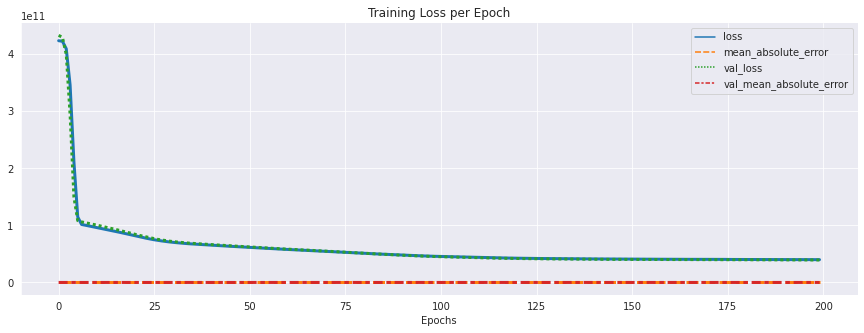

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [ ]:
# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

##### How to evaluate the model's results

*  MAE is a metric that measures the average absolute difference between the predicted and true values, without considering the direction of the difference.

* MSE is a metric that measures the average squared difference between the predicted and true values. It penalizes large errors more than small errors and is widely used in regression problems.(which is our case)

* RMSE is another widely used metric in regression problems and provides a measure of the standard deviation of the errors.

* The explained variance score is a metric that measures how much of the variance in the target variable is explained by the model. It ranges from 0 to 1, with higher scores indicating better performance.

These metrics provide a quantitative evaluation of the performance of a regression model on the test data.

In [ ]:
# predictions on the test set
predictions = model.predict(X_scale_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

203/203 [==============================] - 0s 2ms/step
MAE:  122795.18557338255
MSE:  39362852468.1015
RMSE:  198400.73706541894
Variance Regression Score:  0.7195330800762714


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


#### Model evaluation

##### Model predictions vs perfect fit
* We can compare the model predictions with a perfect fit to see how accurate the model is.
* The red line represents the perfect prediction.
* We are being punish by the outliers, which are the expensive houses. Our model is not good predicting luxury houses.
* On the other hand, our model is good predicting the price of houses between 0 and 2 million. There is clearly a good fit.
* It may be worth it retraining our model just on price houses below $3 million.

[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

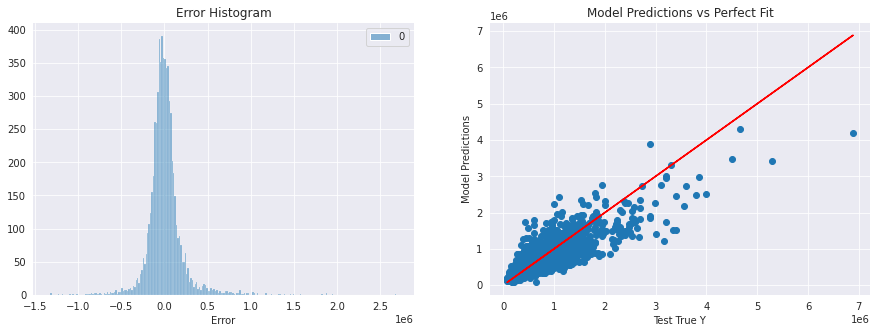

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6484, 1) - predictions
sns.histplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

##### Test the model
Predicting on a brand new house

We are going to use the model to predict the price on a brand-new house. We are going to choose the first house of the data set and drop the price. single_house is going to have all the features that we need to predict the price. After that we need to reshape the variable and scale the features.



In [ ]:
# fueatures of new house
single_house = df_feature2.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 12))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['price'])

Features of new house:
bedrooms            3.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
Name: 0, dtype: float64
1/1 [==============================] - 0s 28ms/step

Prediction Price: 280788.56

Original Price: 221900.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



##### Conclusion model 1

We did a regression thanks to a NN and obtain a certain result.

If you look at the regression line you can see that some points are really far, but they have an impact so maybe construct a model with a shorterer dataset could have end with a better result.

Let's try with our other datasets

----------------

#### NN without scaling data


If you don't normalize data, you may encounter numerical issues when computing the Mean Squared Error (MSE) and end up with NaN values.

Here it's what I'm facing!

MSE is calculated by taking the average of the squared differences between the predicted and actual values of a dataset. If the input data has a wide range of values, it can lead to numerical instability when computing the squared differences. This can cause overflow or underflow in the computation, which may result in NaN values being produced as the output of the calculation.

Let's its impact in our example

##### Building

In [ ]:
model2 = Sequential()

# input layer
model2.add(Dense(19,activation='relu', input_shape=(12,)))

# hidden layers
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))

# output layer
model2.add(Dense(1))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 19)                247       
                                                                 
 dense_6 (Dense)             (None, 19)                380       
                                                                 
 dense_7 (Dense)             (None, 19)                380       
                                                                 
 dense_8 (Dense)             (None, 19)                380       
                                                                 
 dense_9 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1,407
Trainable params: 1,407
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam',
              loss='mse',
              metrics=['mean_absolute_error'])

##### Training

Training the model

In [ ]:
model2.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=200)

Epoch 1/200
119/119 [==============================] - 3s 8ms/step - loss: 389239308288.0000 - mean_absolute_error: 506517.5938 - val_loss: 351713492992.0000 - val_mean_absolute_error: 458016.0938
Epoch 2/200
119/119 [==============================] - 1s 6ms/step - loss: 292479664128.0000 - mean_absolute_error: 389316.0625 - val_loss: 186226769920.0000 - val_mean_absolute_error: 269941.0938
Epoch 3/200
119/119 [==============================] - 1s 6ms/step - loss: 114403729408.0000 - mean_absolute_error: 202669.9688 - val_loss: 88465244160.0000 - val_mean_absolute_error: 189516.9688
Epoch 4/200
119/119 [==============================] - 1s 6ms/step - loss: 84541759488.0000 - mean_absolute_error: 187411.1250 - val_loss: 84639301632.0000 - val_mean_absolute_error: 185860.4844
Epoch 5/200
119/119 [==============================] - 1s 5ms/step - loss: 81231413248.0000 - mean_absolute_error: 184348.5781 - val_loss: 81850679296.0000 - val_mean_absolute_error: 181395.8438
Epoch 6/200
119/119 

Training loss per epoch

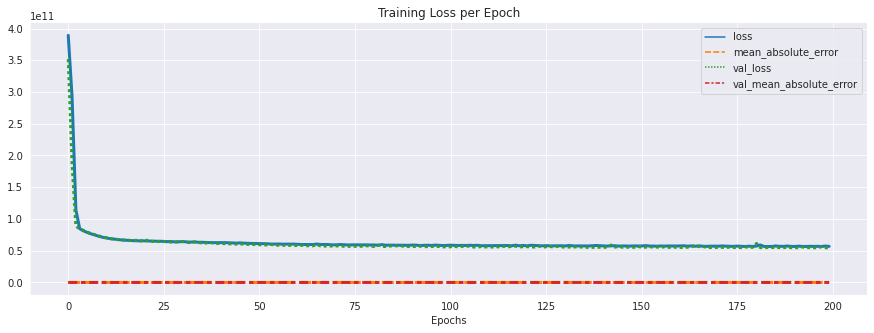

In [ ]:
losses = pd.DataFrame(model2.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [ ]:
# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# predictions on the test set
predictions = model2.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

203/203 [==============================] - 1s 2ms/step
MAE:  155256.29010593385
MSE:  54572724224.38211
RMSE:  233608.05684817917
Variance Regression Score:  0.6109728474237788


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


##### Test

[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

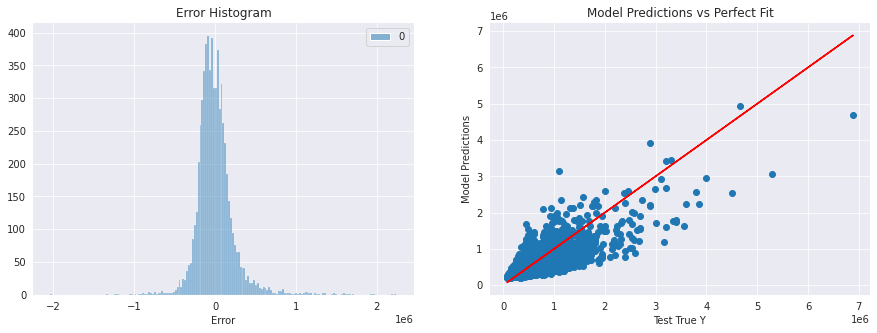

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6484, 1) - predictions
sns.histplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

###### Test the model
Predicting on a brand new house

In [ ]:
# fueatures of new house
single_house = df_feature2.drop('price',axis=1).iloc[0]
#print(f'Features of new house:\n{single_house}')

# pass unscaled features directly to the model
prediction = model2.predict(single_house.values.reshape(1, -1))

# run the model and get the price prediction
print('\nPrediction Price:', prediction[0, 0])

# original price
print('\nOriginal Price:',df.iloc[0]['price'])

1/1 [==============================] - 0s 96ms/step

Prediction Price: 335352.44

Original Price: 221900.0


##### Diff between with & without scaling
The first model predicted 282315.9 when the second predicted 344255.3.

We can assume that the unscaled features may not be equally weighted and could lead to a less accurate prediction. This is particularly true if there are features with widely varying scales or if there are outliers in the data, which can have a significant impact on the unscaled features.

---------------

#### NN without outliers

##### Data engineering
scaling & split

In [ ]:
# Features
X = data_feature2.drop('price',axis=1)

# Label
y = data_feature2['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14326, 12)
(6141, 12)
(14326,)
(6141,)


Normalizing / scaling data

In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_scale_train.max())
print('Min: ', X_scale_train.min())

Max:  1.0
Min:  0.0


##### Building

In [ ]:
model3 = Sequential()

# input layer
model3.add(Dense(19,activation='relu', input_shape=(12,)))

# hidden layers
model3.add(Dense(19,activation='relu'))
model3.add(Dense(19,activation='relu'))
model3.add(Dense(19,activation='relu'))

# output layer
model3.add(Dense(1))

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 19)                247       
                                                                 
 dense_11 (Dense)            (None, 19)                380       
                                                                 
 dense_12 (Dense)            (None, 19)                380       
                                                                 
 dense_13 (Dense)            (None, 19)                380       
                                                                 
 dense_14 (Dense)            (None, 1)                 20        
                                                                 
Total params: 1,407
Trainable params: 1,407
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer='adam',
              loss='mse',
              metrics=['mean_absolute_error'])

##### Training

In [ ]:
model3.fit(x=X_scale_train,y=y_train.values,
          validation_data=(X_scale_test,y_test.values),
          batch_size=128,epochs=200)

Epoch 1/200
112/112 [==============================] - 2s 6ms/step - loss: 270941650944.0000 - mean_absolute_error: 477268.9062 - val_loss: 270881800192.0000 - val_mean_absolute_error: 476297.6875
Epoch 2/200
112/112 [==============================] - 0s 4ms/step - loss: 270708031488.0000 - mean_absolute_error: 477033.1875 - val_loss: 270035075072.0000 - val_mean_absolute_error: 475440.8438
Epoch 3/200
112/112 [==============================] - 1s 5ms/step - loss: 266612211712.0000 - mean_absolute_error: 472872.2500 - val_loss: 259657170944.0000 - val_mean_absolute_error: 464823.8438
Epoch 4/200
112/112 [==============================] - 1s 5ms/step - loss: 239898034176.0000 - mean_absolute_error: 444617.5625 - val_loss: 209952112640.0000 - val_mean_absolute_error: 410283.1250
Epoch 5/200
112/112 [==============================] - 1s 5ms/step - loss: 160019972096.0000 - mean_absolute_error: 345817.8438 - val_loss: 104337096704.0000 - val_mean_absolute_error: 261153.2031
Epoch 6/200
112

Training loss per epoch

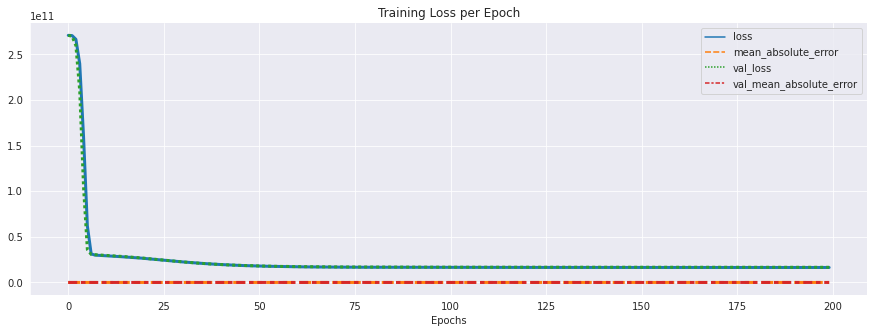

In [ ]:
losses = pd.DataFrame(model3.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [ ]:
# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# predictions on the test set
predictions = model3.predict(X_scale_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

192/192 [==============================] - 0s 2ms/step
MAE:  97928.81515632634
MSE:  16611039197.084152
RMSE:  128883.82054037719
Variance Regression Score:  0.6227453223856602


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


##### Test

[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

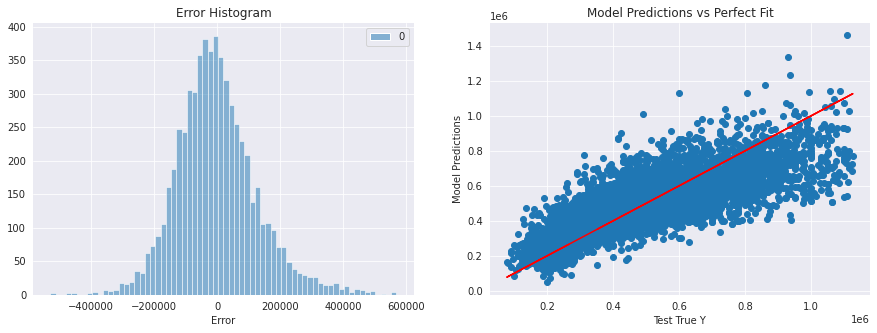

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6141, 1) - predictions
sns.histplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

###### Test the model
Predicting on a brand new house

In [ ]:
# fueatures of new house
single_house = data_feature2.drop('price',axis=1).iloc[0]
# print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 12))

# run the model and get the price prediction
print('\nPrediction Price:',model3.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['price'])

1/1 [==============================] - 0s 23ms/step

Prediction Price: 294157.06

Original Price: 221900.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



##### Diff between with & without outliers

The main difference between Model 1 and Model 3 is that Model 3 has had 1000 outliers removed from the data, while Model 1 has not. Outliers are data points that lie far from the typical range of values for a particular feature, and can have a significant impact on the performance of a machine learning model.

By removing the 1000 outliers in Model 3, the remaining data points are likely to be more representative of the typical range of values for the features, which could lead to better model performance. In particular, removing outliers can help reduce the impact of noise or anomalies in the data, which can make it harder for the model to generalize to new, unseen data.

By observing their results we see that the errors are lower for the 3rd model.
But the 1st ond had a better view and understanding of the dataset.
It's highly possible that removing outliers in Model 3 could have lead to a loss of information and biased the model, resulting in a lower variance regression score compared to Model 1. The outliers may have contained valuable information or represented important patterns in the data that were not captured by the remaining data points.

By retaining the outliers in Model 1, the model may have been able to capture a wider range of patterns and variations in the data, leading to a higher variance regression score. However, it's also possible that the outliers in Model 1 were simply noise or anomalies that were better removed from the data, and that the higher variance regression score is simply a result of overfitting the model to the training data.

So I will conclude by saying that I will use the 3rd model to predict low prices when the 1st one will be better if the price is high.

More, I will say that in fact these outliers aren't really lies as it's just very very rare cases (by example a house with significantly high number of bedrooms, a villa, etc.).

So I think, for my NN the best model would be the 1st even if there are higher errors, due to a lower accuracy on cheaper houses.

More, I will add that by keeping the outliers predictions will be higher than without as the model will take in account more higher values.
------------------------

#### Find best parameters ...

I did several tries to find the best dataset, but I could have done the same to find the best parameters for the model (batch size, number of layer, optimizer, etc.).

I found that the best dataset is the scaled one with the outliers.

By the way, I could have remove more outliers, by example the outliers of each columns.

### Other models

In [ ]:
# Features
X = df_feature2.drop('price',axis=1)

# Label
y = df_feature2['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 12)
(6484, 12)
(15129,)
(6484,)


Normalizing / scaling data

In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_scale_train.max())
print('Min: ', X_scale_train.min())

Max:  1.0000000000000002
Min:  0.0


#### Models's evaluations

In this part, to evaluate the models I will use the following scores :

* The mean squared error (MSE) between the true values of the target variable (y_test) and the predicted values (y_pred). This is a commonly used metric that measures the average squared difference between the predicted and true values. We used it previously on the NN

* The R-squared score is a metric that measures the proportion of variance in the target variable that can be explained by the model. It ranges from 0 to 1, with higher scores indicating better performance.

* The score of the regression model using the test data. This is likely the accuracy or performance score of the trained regression model on the test data.

* The explained variance score between the predicted values and true values. The explained variance score is a metric that measures how much of the variance in the target variable is explained by the model. It ranges from 0 to 1, with higher scores indicating better performance.


More, we need to speak about the difference between some of these results, as they are very close :
*  The explained variance score and R-squared score are related but not exactly the same.

  The explained variance score, also known as the coefficient of determination, measures the proportion of variance in the target variable that can be explained by the regression model. It ranges from 0 to 1, with higher scores indicating better performance.

  On the other hand, the R-squared score also measures the proportion of variance in the target variable that can be explained by the regression model. However, it is defined as the ratio of the explained variance to the total variance in the target variable. It also ranges from 0 to 1, with higher scores indicating better performance.

  Therefore, both metrics provide a measure of the performance of the regression model. The main difference between them is that the explained variance score measures the proportion of variance in the target variable that is explained by the model, while the R-squared score measures the proportion of variance that is explained relative to the total variance in the target variable.

* The R-squared score and the score function in scikit-learn are related but not exactly the same.

  The score function in scikit-learn returns the mean accuracy of the regression model on the test data. The exact definition of this score depends on the specific regression algorithm being used, but generally it is a measure of how well the model fits the test data.

  The R-squared score, on the other hand, is a metric that measures the proportion of variance in the target variable that can be explained by the regression model. It is related to the mean accuracy score, but it takes into account the variability in the target variable and provides a better measure of the quality of the regression model.

  It is possible for the score function to return the same value as the R-squared score, especially if the regression model is performing well. However, it is important to keep in mind that the two metrics are not identical and may differ in some cases.


All these results will be used it the following part.

##### Linear Regression

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
reg = LinearRegression()
reg.fit(X_scale_train, y_train)

LinearRegression()

In [ ]:
#predict on the test data
y_pred = reg.predict(X_scale_test)

In [ ]:
mse_reg = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_reg)
print("R-squared:", r2)


reg_score = reg.score(X_scale_test,y_test)
pred_reg = reg.predict(X_scale_test)
expl_reg = explained_variance_score(pred_reg,y_test)

Mean Squared Error: 46900230294.543495
R-squared: 0.6656548699852789


Test

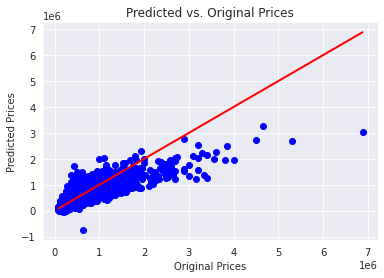

In [ ]:
import matplotlib.pyplot as plt

# plot predicted values and original values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Original Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Original Prices')
plt.show()

In [ ]:
# Features of new house
single_house = df_feature2.drop('price', axis=1).iloc[0]
# print(f'Features of new house:\n{single_house}')

# Reshape the numpy array
single_house = scaler.transform(single_house.values.reshape(-1, 12))

# Run the model and get the price prediction
predicted_price = reg.predict(single_house)
print('\nPrediction Price:', predicted_price[0])

# Original price
original_price = df.iloc[0]['price']
print('\nOriginal Price:', original_price)



Prediction Price: 245383.28481176659

Original Price: 221900.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



#### Comparison

Comparison between Multiple Linear Regression, Decision Tree, Random Forest Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

##### Multiple Linear Regression: (here I created another linear regression model)

Fitting the train set to multiple linear regression and getting the score of the model

In [ ]:
mlr = LinearRegression()
mlr.fit(X_scale_train,y_train)
mlr_score = mlr.score(X_scale_test,y_test)
pred_mlr = mlr.predict(X_scale_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

###### Result

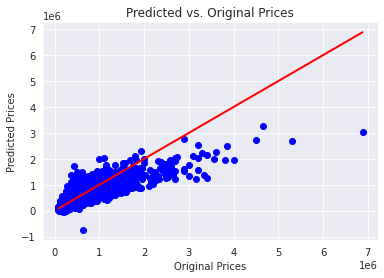

In [ ]:
import matplotlib.pyplot as plt

# plot predicted values and original values
plt.scatter(y_test, pred_mlr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Original Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Original Prices')
plt.show()

In [ ]:
# Features of new house
single_house = df_feature2.drop('price', axis=1).iloc[6]
# print(f'Features of new house:\n{single_house}')

# Reshape the numpy array
single_house = scaler.transform(single_house.values.reshape(-1, 12))

# Run the model and get the price prediction
predicted_price = mlr.predict(single_house)
print('\nPrediction Price:', predicted_price[0])

# Original price
original_price = df.iloc[6]['price']
print('\nOriginal Price:', original_price)



Prediction Price: 265914.91565925383

Original Price: 257500.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



##### Decision Tree

In [ ]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_scale_train,y_train)
tr_regressor.score(X_scale_test,y_test)
pred_tr = tr_regressor.predict(X_scale_test)
decision_score=tr_regressor.score(X_scale_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

###### Result

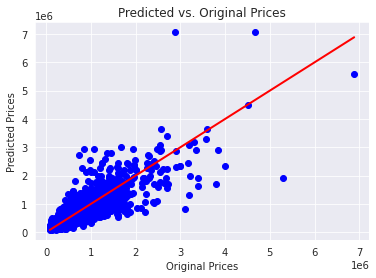

In [ ]:
import matplotlib.pyplot as plt

# plot predicted values and original values
plt.scatter(y_test, pred_tr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Original Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Original Prices')
plt.show()

In [ ]:
# Features of new house
single_house = df_feature2.drop('price', axis=1).iloc[6]
# print(f'Features of new house:\n{single_house}')

# Reshape the numpy array
single_house = scaler.transform(single_house.values.reshape(-1, 12))

# Run the model and get the price prediction
predicted_price = tr_regressor.predict(single_house)
print('\nPrediction Price:', predicted_price[0])

# Original price
original_price = df.iloc[6]['price']
print('\nOriginal Price:', original_price)

#
print('It s a perfect preiction')


Prediction Price: 257500.0

Original Price: 257500.0
It s a perfect preiction


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



##### Random Forest Regression Model

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_scale_train,y_train)
rf_regressor.score(X_scale_test,y_test)
rf_pred =rf_regressor.predict(X_scale_test)
rf_score=rf_regressor.score(X_scale_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)


###### Result

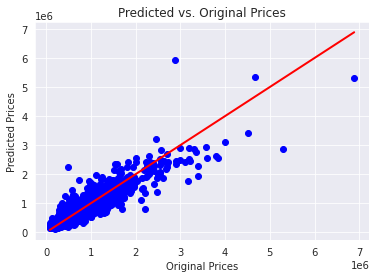

In [ ]:
import matplotlib.pyplot as plt

# plot predicted values and original values
plt.scatter(y_test, rf_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Original Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Original Prices')
plt.show()

In [ ]:
# Features of new house
single_house = df_feature2.drop('price', axis=1).iloc[6]
# print(f'Features of new house:\n{single_house}')

# Reshape the numpy array
single_house = scaler.transform(single_house.values.reshape(-1, 12))

# Run the model and get the price prediction
predicted_price = rf_regressor.predict(single_house)
print('\nPrediction Price:', predicted_price[0])

# Original price
original_price = df.iloc[6]['price']
print('\nOriginal Price:', original_price)



Prediction Price: 254232.14285714287

Original Price: 257500.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Calculate Model Score

Let's calculate the model score to understand how our model performed along with the explained variance score.

In [ ]:
print("Linear Regression Model Score is ",round(reg.score(X_test,y_test)*100))
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Linear Regression','Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[reg_score,mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_reg,expl_mlr,expl_tr,expl_rf],
                            'MSE':[mse_reg, mean_squared_error(y_test, pred_mlr), mean_squared_error(y_test, pred_tr), mean_squared_error(y_test, rf_pred)]
                           })
models_score.sort_values(by='Score',ascending=False)


Linear Regression Model Score is  -47702200513
Multiple Linear Regression Model Score is  -47702200513
Decision tree  Regression Model Score is  -15498
Random Forest Regression Model Score is  -16510


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



,Model,Score,Explained Variance Score,MSE
3,Random forest Regression,0.858784,0.833921,1.980902e+10
2,Decision Tree,0.711168,0.710910,4.051590e+10
0,Linear Regression,0.665655,0.474643,4.690023e+10
1,Multiple Linear Regression,0.665655,0.474643,4.690023e+10


Knowing that the MSE of our NN was : 135374969633.48412

In [ ]:
print(mean_squared_error(y_test, rf_pred)-39077280359.73005)

-19268260437.763535


####Conclusion
From the above it is clear that random forest accuracy is 85% and also expalined variance score is 0.83 .

So Random Forest is the most suitable model for predicting the price of the house, more than the 3 other.


####Tuning

Now we found out our best basic model we should try to uprade it by finding its best parameters!

Observe the param of our random forest

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_regressor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 28,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


There are lot of parameters, we must focus on the morre important :
* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

######Grid search

Random Hyperparameter Grid

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


Train the random search

Most important parameters in RandomizedSerchCV :
*  n_iter, which controls the number of different combinations to try
* cv which is the number of folds to use for cross validation (we use 100 and 3 respectively)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_scale_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

Show the best parameters from the last step

In [ ]:
rf_random.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

Evaluate Random Search

We are gonna compare our first random forest model with the best of the grid search to see which one we must choose

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
print("Base model **************************")
base_model = RandomForestRegressor(n_estimators=28,random_state=0)
base_model.fit(X_scale_train,y_train)
base_accuracy = evaluate(base_model, X_scale_test,y_test)
print()
#
print("Best grid search model *****************")
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_scale_test,y_test)
print()
#
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Base model **************************
Model Performance
Average Error: 74786.0477 degrees.
Accuracy = 85.86%.

Best grid search model *****************
Model Performance
Average Error: 73787.1943 degrees.
Accuracy = 86.02%.

Improvement of 0.18%.


Comparison of some predictions

In [ ]:
for i in range(0,5):
  # Features of new house
  single_house = df_feature2.drop('price', axis=1).iloc[i]
  # print(f'Features of new house:\n{single_house}')

  # Reshape the numpy array
  single_house = scaler.transform(single_house.values.reshape(-1, 12))

  # Run the model and get the price prediction
  predicted_price = base_model.predict(single_house)
  print('Base model Prediction Price:', predicted_price[0])
  #
  # Run the model and get the price prediction
  predicted_price = best_random.predict(single_house)
  print('Best grid search model Prediction Price:', predicted_price[0])
  # Original price
  original_price = df.iloc[i]['price']
  print('Original Price:', original_price)

  print()
  print('********************')




Base model Prediction Price: 241487.5
Best grid search model Prediction Price: 231521.575
Original Price: 221900.0

********************
Base model Prediction Price: 528270.5357142857
Best grid search model Prediction Price: 535747.275
Original Price: 538000.0

********************
Base model Prediction Price: 218928.57142857142
Best grid search model Prediction Price: 225624.375
Original Price: 180000.0

********************
Base model Prediction Price: 505678.5714285714
Best grid search model Prediction Price: 552123.375
Original Price: 604000.0

********************
Base model Prediction Price: 510750.0
Best grid search model Prediction Price: 515112.5
Original Price: 510000.0

********************


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



By observing the prediction one by one it can seem that the first model was better, but more predictions are displayed more it brings us to the conclusion that the best model is the one issued from the grid search

# Conclusion

Through this exercice we had a relevant reminder of the work done on a dataset in order to create a predictive model :
* during the preprocessing
* to build the model
* to evaluate and test it

In our case I found out that the best model was a random forest regression (by tunning other models it's possible to obtain even better results than my random forest).